# Income Classifier

In [10]:
#Importing necessary libraries

import pandas as pd

import numpy as np

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score,confusion_matrix


In [11]:
# importing data

data_income=pd.read_csv('income.csv')

In [12]:
#creating copy of the data
data=data_income.copy()

In [13]:
#Getting to know the data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
age              31978 non-null int64
JobType          31978 non-null object
EdType           31978 non-null object
maritalstatus    31978 non-null object
occupation       31978 non-null object
relationship     31978 non-null object
race             31978 non-null object
gender           31978 non-null object
capitalgain      31978 non-null int64
capitalloss      31978 non-null int64
hoursperweek     31978 non-null int64
nativecountry    31978 non-null object
SalStat          31978 non-null object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB
None


In [14]:
#checking for missing values
print(data.isnull().sum())

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64


No missing values

In [15]:
#getting summary of numerical varaibale
summary_num=data.describe()
print(summary_num)

                age   capitalgain   capitalloss  hoursperweek
count  31978.000000  31978.000000  31978.000000  31978.000000
mean      38.579023   1064.360623     86.739352     40.417850
std       13.662085   7298.596271    401.594301     12.345285
min       17.000000      0.000000      0.000000      1.000000
25%       28.000000      0.000000      0.000000     40.000000
50%       37.000000      0.000000      0.000000     40.000000
75%       48.000000      0.000000      0.000000     45.000000
max       90.000000  99999.000000   4356.000000     99.000000


In [16]:
#summary for categorical variables
summary_cat=data.describe(include='O')
print(summary_cat)

         JobType    EdType        maritalstatus       occupation relationship  \
count      31978     31978                31978            31978        31978   
unique         9        16                    7               15            6   
top      Private   HS-grad   Married-civ-spouse   Prof-specialty      Husband   
freq       22286     10368                14692             4038        12947   

          race gender   nativecountry                        SalStat  
count    31978  31978           31978                          31978  
unique       5      2              41                              2  
top      White   Male   United-States   less than or equal to 50,000  
freq     27430  21370           29170                          24283  


Frequency of each categories

In [18]:
#variable JobType 
print(data['JobType'].value_counts())

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 ?                    1809
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: JobType, dtype: int64


? marks is present in JobType

In [21]:
#let's look for special characters
print("JobTYpe: ",np.unique(data['JobType']))
print("\n EdType: ",np.unique(data['EdType']))
print("\n occupation: ",np.unique(data['occupation']))
print("\n relationship:",np.unique(data['relationship']))
print("\n race: ",np.unique(data['race']))
print("\n gender: ",np.unique(data['gender']))
print("\n nativeCountry: ",np.unique(data['nativecountry']))
print("\n SalStat:",np.unique(data['SalStat']))

JobTYpe:  [' ?' ' Federal-gov' ' Local-gov' ' Never-worked' ' Private'
 ' Self-emp-inc' ' Self-emp-not-inc' ' State-gov' ' Without-pay']

 EdType:  [' 10th' ' 11th' ' 12th' ' 1st-4th' ' 5th-6th' ' 7th-8th' ' 9th'
 ' Assoc-acdm' ' Assoc-voc' ' Bachelors' ' Doctorate' ' HS-grad'
 ' Masters' ' Preschool' ' Prof-school' ' Some-college']

 occupation:  [' ?' ' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']

 relationship: [' Husband' ' Not-in-family' ' Other-relative' ' Own-child' ' Unmarried'
 ' Wife']

 race:  [' Amer-Indian-Eskimo' ' Asian-Pac-Islander' ' Black' ' Other' ' White']

 gender:  [' Female' ' Male']

 nativeCountry:  [' Cambodia' ' Canada' ' China' ' Columbia' ' Cuba' ' Dominican-Republic'
 ' Ecuador' ' El-Salvador' ' England' ' France' ' Germany' ' Greece'
 ' Guatemala' ' Haiti

In [24]:
#converting special characters to na_values.
data=pd.read_csv('income.csv',na_values=[' ?'])

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
age              31978 non-null int64
JobType          30169 non-null object
EdType           31978 non-null object
maritalstatus    31978 non-null object
occupation       30162 non-null object
relationship     31978 non-null object
race             31978 non-null object
gender           31978 non-null object
capitalgain      31978 non-null int64
capitalloss      31978 non-null int64
hoursperweek     31978 non-null int64
nativecountry    31978 non-null object
SalStat          31978 non-null object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [26]:
#data preprocessing
data.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [29]:
#to consider atleast one column value is missing
missing=data[data.isnull().any(axis=1)]
print(missing)

       age JobType         EdType           maritalstatus occupation  \
8       17     NaN           11th           Never-married        NaN   
17      32     NaN   Some-college      Married-civ-spouse        NaN   
29      22     NaN   Some-college           Never-married        NaN   
42      52     NaN           12th           Never-married        NaN   
44      63     NaN        1st-4th      Married-civ-spouse        NaN   
57      72     NaN        HS-grad      Married-civ-spouse        NaN   
69      53     NaN        5th-6th                 Widowed        NaN   
73      57     NaN      Assoc-voc                 Widowed        NaN   
75      20     NaN   Some-college           Never-married        NaN   
76      21     NaN   Some-college           Never-married        NaN   
97      34     NaN        HS-grad           Never-married        NaN   
133     18     NaN           12th           Never-married        NaN   
137     65     NaN   Some-college      Married-civ-spouse       

In [30]:
print(missing.sort_values(by='JobType'))

       age        JobType         EdType           maritalstatus occupation  \
4825    18   Never-worked           10th           Never-married        NaN   
10215   23   Never-worked        7th-8th                Divorced        NaN   
14073   17   Never-worked           10th           Never-married        NaN   
19542   18   Never-worked           11th           Never-married        NaN   
22385   20   Never-worked   Some-college           Never-married        NaN   
31296   30   Never-worked        HS-grad      Married-civ-spouse        NaN   
31305   18   Never-worked   Some-college           Never-married        NaN   
8       17            NaN           11th           Never-married        NaN   
17      32            NaN   Some-college      Married-civ-spouse        NaN   
29      22            NaN   Some-college           Never-married        NaN   
42      52            NaN           12th           Never-married        NaN   
44      63            NaN        1st-4th      Marrie

If the individual has Never-worked the occupation is ovbiously missing.
7 rows
to impute these 7 rows by some significant Values is complex, let's drop these rows.

In [33]:
#dropping missing values
data2=data.dropna(axis=0)
print(data2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 31977
Data columns (total 13 columns):
age              30162 non-null int64
JobType          30162 non-null object
EdType           30162 non-null object
maritalstatus    30162 non-null object
occupation       30162 non-null object
relationship     30162 non-null object
race             30162 non-null object
gender           30162 non-null object
capitalgain      30162 non-null int64
capitalloss      30162 non-null int64
hoursperweek     30162 non-null int64
nativecountry    30162 non-null object
SalStat          30162 non-null object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB
None


In [35]:
#Relationshipbetween independent variables
correlation=data2.corr()
print(correlation)

                   age  capitalgain  capitalloss  hoursperweek
age           1.000000     0.080154     0.060165      0.101599
capitalgain   0.080154     1.000000    -0.032229      0.080432
capitalloss   0.060165    -0.032229     1.000000      0.052417
hoursperweek  0.101599     0.080432     0.052417      1.000000


None of the variables are conisderably correlated with each other.

In [36]:
#extracting the columns names
data2.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

Variables and thier dependencies with SalaStat

In [38]:
#variable gender

gender=pd.crosstab(index=data2['gender'],
                  columns='count',
                  normalize=True)
print(gender)

col_0       count
gender           
 Female  0.324315
 Male    0.675685


In [40]:
#gender vs SalStat
gender_SalStat=pd.crosstab(index=data2['gender'],
                          columns=data2['SalStat'],
                          margins=True,
                          normalize='index')
print(gender_SalStat)

SalStat   greater than 50,000   less than or equal to 50,000
gender                                                      
 Female              0.113678                       0.886322
 Male                0.313837                       0.686163
All                  0.248922                       0.751078


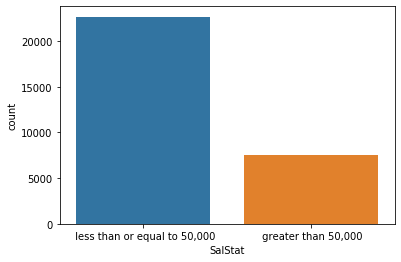

In [41]:
#frequnecy distribution of SalStat

SalStat=sns.countplot(data2['SalStat'])

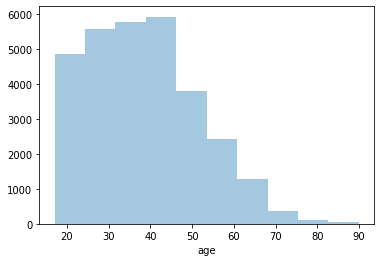

In [44]:
#variable age
sns.distplot(data2['age'],bins=10,kde=False)

SalStat
 greater than 50,000             43
 less than or equal to 50,000    34
Name: age, dtype: int64

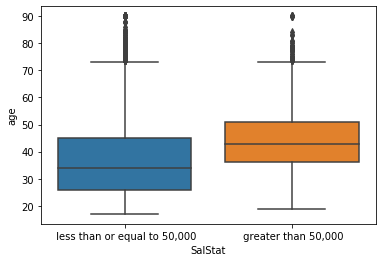

In [45]:
#age vs SalStat
sns.boxplot('SalStat','age',data=data2)
data2.groupby('SalStat')['age'].median()

In [47]:
#varaible JobType
JobType=pd.crosstab(index=data2['JobType'],
                   columns='count',
                   normalize=True)

print(JobType)

col_0                 count
JobType                    
 Federal-gov       0.031265
 Local-gov         0.068530
 Private           0.738877
 Self-emp-inc      0.035608
 Self-emp-not-inc  0.082853
 State-gov         0.042404
 Without-pay       0.000464


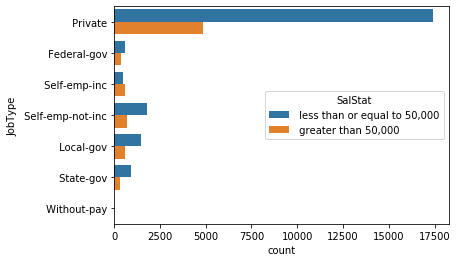

In [56]:
sns.countplot(y=data2['JobType'],hue=data2['SalStat'])

In [55]:
#JobType vs SalStat
JobType_SalStat=pd.crosstab(index=data2['JobType'],
                           columns=data2['SalStat'],
                           margins=True,
                           normalize='index')
print(JobType_SalStat)

SalStat             greater than 50,000   less than or equal to 50,000
JobType                                                               
 Federal-gov                   0.387063                       0.612937
 Local-gov                     0.294630                       0.705370
 Private                       0.218792                       0.781208
 Self-emp-inc                  0.558659                       0.441341
 Self-emp-not-inc              0.285714                       0.714286
 State-gov                     0.268960                       0.731040
 Without-pay                   0.000000                       1.000000
All                            0.248922                       0.751078


SalStat         greater than 50,000   less than or equal to 50,000
EdType                                                            
 10th                      0.071951                       0.928049
 11th                      0.056298                       0.943702
 12th                      0.076923                       0.923077
 1st-4th                   0.039735                       0.960265
 5th-6th                   0.041667                       0.958333
 7th-8th                   0.062837                       0.937163
 9th                       0.054945                       0.945055
 Assoc-acdm                0.253968                       0.746032
 Assoc-voc                 0.263198                       0.736802
 Bachelors                 0.421491                       0.578509
 Doctorate                 0.746667                       0.253333
 HS-grad                   0.164329                       0.835671
 Masters                   0.564229                       0.43

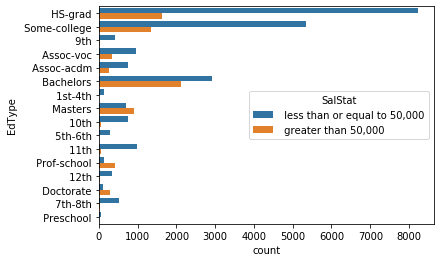

In [59]:
#variable eductaion vs SalStat

sns.countplot(y=data2['EdType'],hue=data2['SalStat'])

EdType_SalStat=pd.crosstab(index=data2['EdType'],
                           columns=data2['SalStat'],
                           margins=True,
                           normalize='index')
print(EdType_SalStat)

SalStat              greater than 50,000   less than or equal to 50,000
occupation                                                             
 Adm-clerical                   0.133835                       0.866165
 Armed-Forces                   0.111111                       0.888889
 Craft-repair                   0.225310                       0.774690
 Exec-managerial                0.485220                       0.514780
 Farming-fishing                0.116279                       0.883721
 Handlers-cleaners              0.061481                       0.938519
 Machine-op-inspct              0.124619                       0.875381
 Other-service                  0.041096                       0.958904
 Priv-house-serv                0.006993                       0.993007
 Prof-specialty                 0.448489                       0.551511
 Protective-serv                0.326087                       0.673913
 Sales                          0.270647                       0

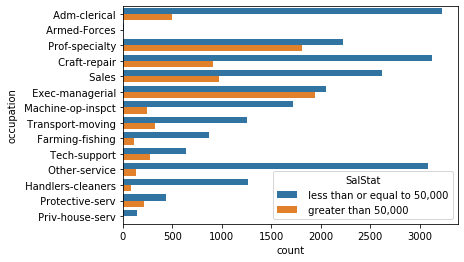

In [60]:
#occupation vs SalStat

sns.countplot(y=data2['occupation'],hue=data2['SalStat'])

occupation_SalStat=pd.crosstab(index=data2['occupation'],
                           columns=data2['SalStat'],
                           margins=True,
                           normalize='index')
print(occupation_SalStat)

SalStat       greater than 50,000   less than or equal to 50,000
capitalgain                                                     
0                        0.214053                       0.785947
114                      0.000000                       1.000000
401                      0.000000                       1.000000
594                      0.000000                       1.000000
914                      0.000000                       1.000000
991                      0.000000                       1.000000
1055                     0.000000                       1.000000
1086                     0.000000                       1.000000
1151                     0.000000                       1.000000
1173                     0.000000                       1.000000
1409                     0.000000                       1.000000
1424                     0.000000                       1.000000
1455                     0.000000                       1.000000
1471                     

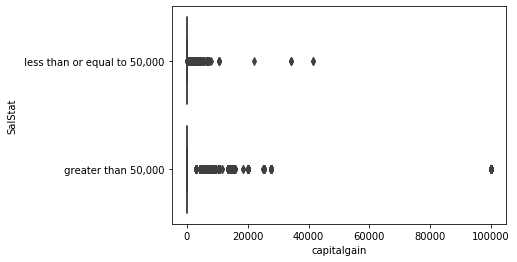

In [65]:
sns.boxplot(x=data2['capitalgain'],y=data2['SalStat'])

capitalgain_SalStat=pd.crosstab(index=data2['capitalgain'],
                           columns=data2['SalStat'],
                           margins=True,
                           normalize='index')
print(capitalgain_SalStat)

SalStat       greater than 50,000   less than or equal to 50,000
capitalloss                                                     
0                        0.235636                       0.764364
155                      0.000000                       1.000000
213                      0.000000                       1.000000
323                      0.000000                       1.000000
419                      0.000000                       1.000000
625                      0.000000                       1.000000
653                      0.666667                       0.333333
810                      0.000000                       1.000000
880                      0.000000                       1.000000
974                      0.000000                       1.000000
1092                     0.000000                       1.000000
1138                     0.000000                       1.000000
1258                     0.000000                       1.000000
1340                     

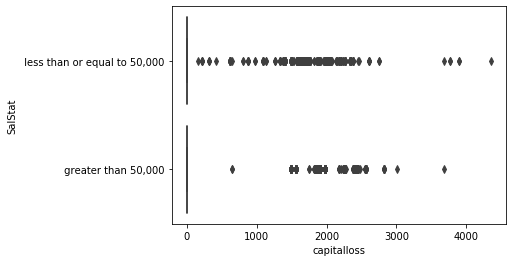

In [66]:
sns.boxplot(x=data2['capitalloss'],y=data2['SalStat'])

capitalloss_SalStat=pd.crosstab(index=data2['capitalloss'],
                           columns=data2['SalStat'],
                           margins=True,
                           normalize='index')
print(capitalloss_SalStat)

SalStat        greater than 50,000   less than or equal to 50,000
hoursperweek                                                     
1                         0.142857                       0.857143
2                         0.133333                       0.866667
3                         0.041667                       0.958333
4                         0.074074                       0.925926
5                         0.157895                       0.842105
6                         0.100000                       0.900000
7                         0.105263                       0.894737
8                         0.058824                       0.941176
9                         0.058824                       0.941176
10                        0.058559                       0.941441
11                        0.000000                       1.000000
12                        0.065693                       0.934307
13                        0.111111                       0.888889
14        

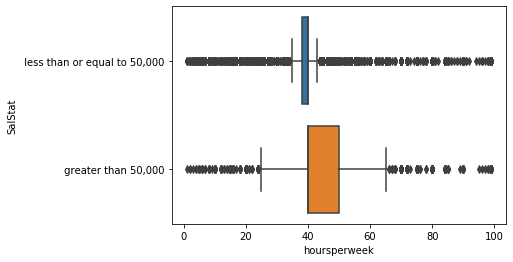

In [68]:
#hoursperweek vs SalStat
sns.boxplot(x=data2['hoursperweek'],y=data2['SalStat'])

hoursperweek_SalStat=pd.crosstab(index=data2['hoursperweek'],
                           columns=data2['SalStat'],
                           margins=True,
                           normalize='index')
print(hoursperweek_SalStat)

# Logistic Regression

In [69]:
#reindexing SalStat to '0' and '1'
data2['SalStat']=data2['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})
print(np.unique(data2['SalStat']))

[0 1]


C:\Users\SANJAY KUMAR\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [70]:
new_data=pd.get_dummies(data2,drop_first=True)

In [72]:
#Storing the column names
columns_list=list(new_data.columns)
print(columns_list)

['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'SalStat', 'JobType_ Local-gov', 'JobType_ Private', 'JobType_ Self-emp-inc', 'JobType_ Self-emp-not-inc', 'JobType_ State-gov', 'JobType_ Without-pay', 'EdType_ 11th', 'EdType_ 12th', 'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th', 'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors', 'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters', 'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college', 'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married', 'maritalstatus_ Separated', 'maritalstatus_ Widowed', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Protective-s

In [73]:
#Separating the input names from data
features=list(set(columns_list)-set(['SalStat']))
print(features)

['maritalstatus_ Married-spouse-absent', 'occupation_ Transport-moving', 'JobType_ Self-emp-inc', 'nativecountry_ Poland', 'occupation_ Armed-Forces', 'EdType_ HS-grad', 'relationship_ Not-in-family', 'nativecountry_ Laos', 'nativecountry_ England', 'race_ White', 'EdType_ 11th', 'race_ Asian-Pac-Islander', 'EdType_ Masters', 'occupation_ Tech-support', 'nativecountry_ Hong', 'capitalgain', 'occupation_ Sales', 'EdType_ 1st-4th', 'nativecountry_ Outlying-US(Guam-USVI-etc)', 'maritalstatus_ Never-married', 'occupation_ Prof-specialty', 'nativecountry_ China', 'JobType_ Private', 'nativecountry_ Ireland', 'occupation_ Handlers-cleaners', 'race_ Other', 'gender_ Male', 'nativecountry_ El-Salvador', 'JobType_ Without-pay', 'relationship_ Own-child', 'nativecountry_ Vietnam', 'occupation_ Priv-house-serv', 'EdType_ 12th', 'EdType_ Bachelors', 'EdType_ Preschool', 'occupation_ Craft-repair', 'nativecountry_ Japan', 'nativecountry_ Peru', 'nativecountry_ Guatemala', 'maritalstatus_ Married-AF

In [74]:
#storing the output values in y
y=new_data['SalStat'].values
print(y)

[0 0 1 ... 0 0 0]


In [75]:
x=new_data[features].values
print(x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [76]:
#splitting the data into train and test
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=0)

In [77]:
#Making an instance of LogisticRegression
logistic=LogisticRegression()

In [79]:
#fitting the values for x and y
logistic.fit(train_x,train_y)

C:\Users\SANJAY KUMAR\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
#prediction from test data
prediction=logistic.predict(test_x)

In [81]:
#confusion matrix
confusion_matrix1=confusion_matrix(test_y,prediction)
print(confusion_matrix1)

[[6338  485]
 [ 941 1285]]


In [82]:
#calculating accuracy
accuracy_score1=accuracy_score(test_y,prediction)
print(accuracy_score1)

0.8424135263565035


# Logistic Regression- removing insignificant variables

In [84]:
cols=['gender','JobType','race','nativecountry']
new_data=data2.drop(cols,axis=1)
print(new_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 31977
Data columns (total 9 columns):
age              30162 non-null int64
EdType           30162 non-null object
maritalstatus    30162 non-null object
occupation       30162 non-null object
relationship     30162 non-null object
capitalgain      30162 non-null int64
capitalloss      30162 non-null int64
hoursperweek     30162 non-null int64
SalStat          30162 non-null int64
dtypes: int64(5), object(4)
memory usage: 3.6+ MB
None


In [85]:
new_data=pd.get_dummies(new_data,drop_first=True)

In [86]:
columns_list=list(new_data.columns)
print(columns_list)

['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'SalStat', 'EdType_ 11th', 'EdType_ 12th', 'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th', 'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors', 'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters', 'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college', 'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married', 'maritalstatus_ Separated', 'maritalstatus_ Widowed', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Protective-serv', 'occupation_ Sales', 'occupation_ Tech-support', 'occupation_ Transport-moving', 'relationship_ Not-in-family', 'relationship_ Other-rel

In [87]:
features=list(set(columns_list)-set(['SalStat']))
print(features)

['maritalstatus_ Married-spouse-absent', 'occupation_ Transport-moving', 'EdType_ Doctorate', 'relationship_ Unmarried', 'occupation_ Armed-Forces', 'EdType_ HS-grad', 'relationship_ Not-in-family', 'EdType_ 7th-8th', 'EdType_ 11th', 'relationship_ Other-relative', 'hoursperweek', 'EdType_ Masters', 'EdType_ Assoc-acdm', 'EdType_ 5th-6th', 'occupation_ Tech-support', 'maritalstatus_ Widowed', 'EdType_ Some-college', 'capitalgain', 'EdType_ Prof-school', 'EdType_ 1st-4th', 'maritalstatus_ Never-married', 'occupation_ Sales', 'occupation_ Prof-specialty', 'capitalloss', 'occupation_ Handlers-cleaners', 'EdType_ 9th', 'relationship_ Wife', 'age', 'occupation_ Protective-serv', 'occupation_ Exec-managerial', 'relationship_ Own-child', 'EdType_ Assoc-voc', 'occupation_ Priv-house-serv', 'EdType_ 12th', 'occupation_ Farming-fishing', 'EdType_ Bachelors', 'maritalstatus_ Married-civ-spouse', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'maritalstatus_ Separated', 'EdType_ Pre

In [88]:
y=new_data['SalStat'].values
print(y)

[0 0 1 ... 0 0 0]


In [89]:
x=new_data[features].values
print(x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [90]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=0)

In [91]:
#Making an instance of LogisticRegression
logistic=LogisticRegression()

In [92]:
logistic.fit(train_x,train_y)

C:\Users\SANJAY KUMAR\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [93]:
prediction=logistic.predict(test_x)

In [94]:
accuracy_score2=accuracy_score(test_y,prediction)
print(accuracy_score2)

0.8388772240026522


# KNN

In [96]:
#importing the library for knn

from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt

In [97]:
#storing the k nearest neighbours classifier
KNN_classifier=KNeighborsClassifier(n_neighbors=5)

In [98]:
KNN_classifier.fit(train_x,train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [100]:
prediction2=KNN_classifier.predict(test_x)

In [101]:
#confusion matrix
confusion_matrix3=confusion_matrix(test_y,prediction)
print(confusion_matrix3)

[[6317  506]
 [ 952 1274]]


In [103]:
accuracy_score3=accuracy_score(test_y,prediction)
print(accuracy_score3)

0.8388772240026522


In [105]:
#Calculating error for K values between 1 to 20
Missclassified_Sample=[]
for i in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x,train_y)
    pred_i=knn.predict(test_x)
    Missclassified_Sample.append((test_y!=pred_i).sum())
    
print(Missclassified_Sample)

[1714, 1507, 1572, 1475, 1504, 1431, 1465, 1450, 1456, 1423, 1473, 1452, 1454, 1434, 1449, 1440, 1441, 1422, 1446]
